In [50]:
import pandas as pd

In [51]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Toxic Comment Analysis/'
train=pd.read_csv(path+"train.csv")
test=pd.read_csv(path+"test.csv")

In [52]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [53]:
print("No. of rows:", train.shape[0])

No. of rows: 159571


In [54]:
hate_tag_count=train.iloc[:,2:].sum()
hate_tag_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

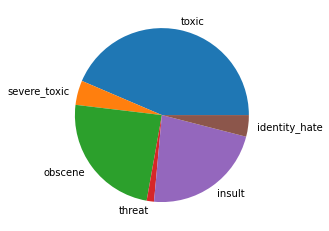

In [56]:
plt.pie(x=hate_tag_count.values,labels=hate_tag_count.index)
plt.show()

Text(0.5, 0, 'Tag type')

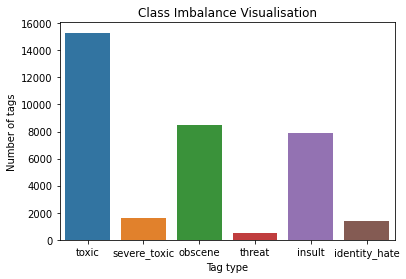

In [57]:
sns.barplot(x=hate_tag_count.index, y=hate_tag_count.values)
plt.title("Class Imbalance Visualisation")
plt.ylabel('Number of tags')
plt.xlabel('Tag type')


In [58]:
#Add an additional column for clean comments
train['clean']=(train.iloc[:,2:].sum(axis=1)==0).astype(int)

In [59]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [60]:
tag_count=train.iloc[:,2:].sum()
tag_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

In [61]:
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total hate tags =",hate_tag_count.sum())
print("Total hate comments =",len(train)-train['clean'].sum())

Total comments =  159571
Total clean comments =  143346
Total hate tags = 35098
Total hate comments = 16225


In [62]:
#Check for missing values in Train dataset
nulls=train.isnull().sum().sum()
print('No. of null values =', nulls)

No. of null values = 0


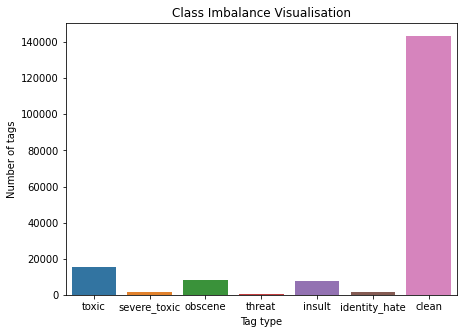

In [63]:
#plot
plt.figure(figsize=(7,5))
ax= sns.barplot(tag_count.index, tag_count.values)
plt.title("Class Imbalance Visualisation")
plt.ylabel('Number of tags')
plt.xlabel('Tag type')
plt.show()

In [64]:
multi_tag=train.iloc[:,2:].sum(axis=1).value_counts()
multi_tag

1    149706
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

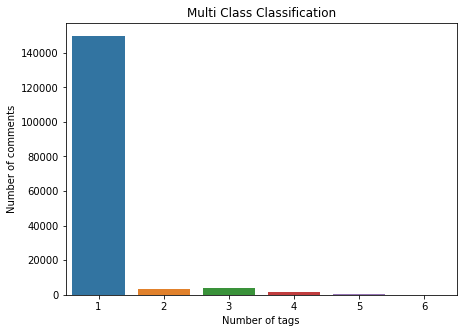

In [65]:
plt.figure(figsize=(7,5))
ax= sns.barplot(multi_tag.index, multi_tag.values)
plt.title("Multi Class Classification")
plt.ylabel('Number of comments')
plt.xlabel('Number of tags')
plt.show()

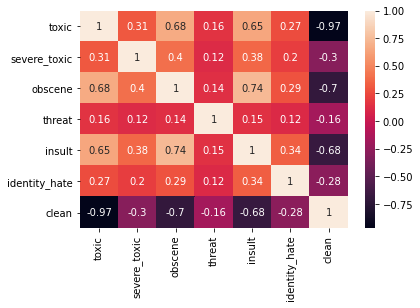

In [66]:
corr=train.iloc[:,2:].corr()
sns.heatmap(corr,annot=True)

In [67]:
print("identity_hate:")
print(train[train.identity_hate==1].iloc[28,1])

identity_hate:
"
Actually I am fully Arabic and Islamic and the correct spelling unlike how you stupid christians have been spelling it is ""Mou'ammar Al Qadhdhaffy"". But you are all too racist and white and stupid too accept that124.180.159.192  "


In [68]:
import re
df=train.copy()
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))

In [69]:
df_counts=df[['count_sent','count_word','count_unique_word','count_letters']]


In [70]:
df_counts.describe()

,count_sent,count_word,count_unique_word,count_letters
count,159571.00000,159571.000000,159571.000000,159571.000000
mean,3.52074,67.273527,48.097323,394.073221
std,5.96225,99.230702,54.436443,590.720282
min,1.00000,1.000000,1.000000,6.000000
25%,1.00000,17.000000,16.000000,96.000000
50%,2.00000,36.000000,31.000000,205.000000
75%,3.00000,75.000000,59.000000,435.000000
max,313.00000,1411.000000,816.000000,5000.000000


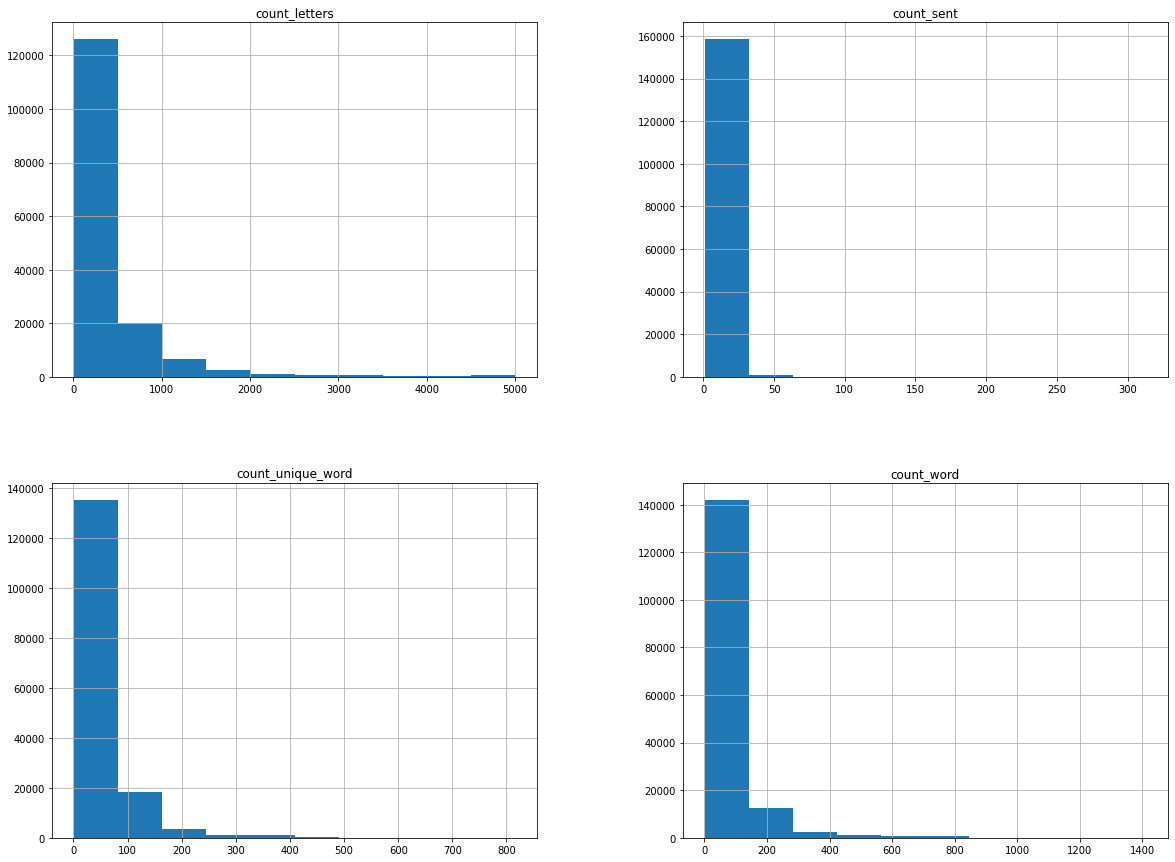

In [71]:
ax=df_counts.hist(figsize=(20,15))

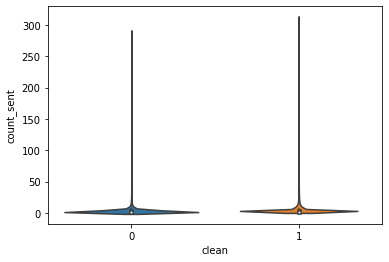

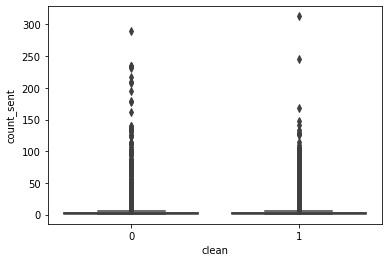

In [72]:
sns.violinplot(y='count_sent',x='clean', data=df)
plt.show()
sns.boxplot(y='count_sent',x='clean', data=df)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


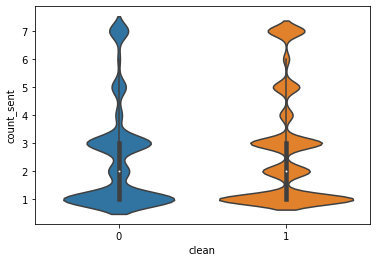

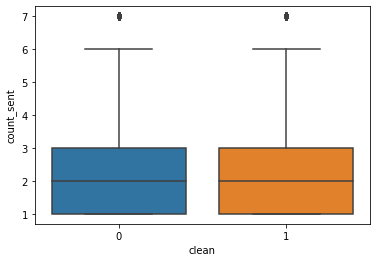

In [73]:
df1=df.copy()
df1['count_sent'].loc[df1['count_sent']>7]=7
sns.violinplot(y='count_sent',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_sent',x='clean', data=df1)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


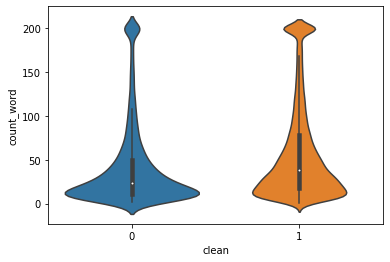

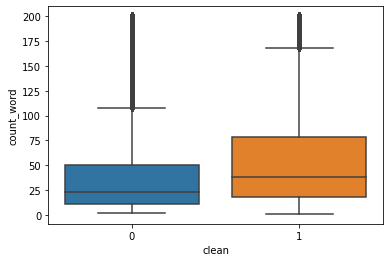

In [74]:
df1=df.copy()
df1['count_word'].loc[df1['count_word']>200]=200
sns.violinplot(y='count_word',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_word',x='clean', data=df1)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


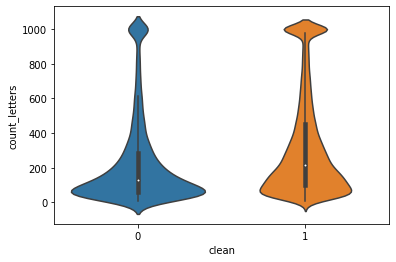

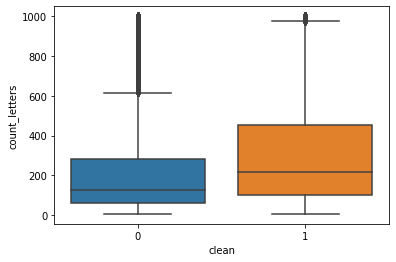

In [75]:
df1=df.copy()
df1['count_letters'].loc[df1['count_letters']>1000]=1000
sns.violinplot(y='count_letters',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_letters',x='clean', data=df1)
plt.show()


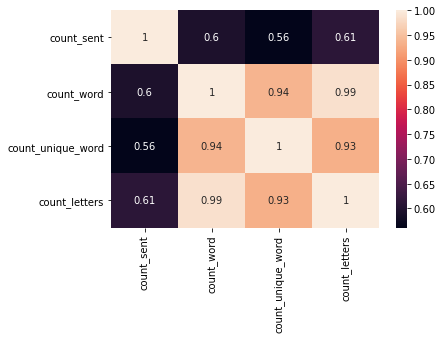

In [76]:
corr=df.iloc[:,-4:].corr()
sns.heatmap(corr,annot=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


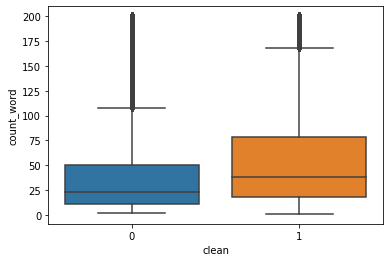

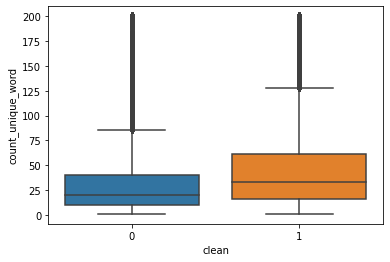

In [77]:
df1=df.copy()
df1['count_word'].loc[df1['count_word']>200]=200
sns.boxplot(y='count_word',x='clean', data=df1)
df1['count_unique_word'].loc[df1['count_unique_word']>200]=200
plt.show()
sns.boxplot(y='count_unique_word',x='clean', data=df1)

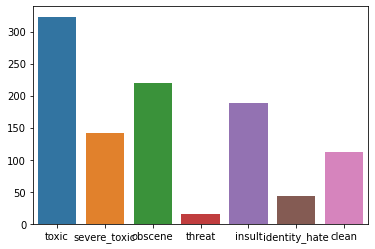

In [78]:
#Spammers more toxic?
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
spammers=df[df['word_unique_percent']<25]
x=spammers.iloc[:,2:9].sum()
ax=sns.barplot(x=x.index, y=x.values)

Text(0.5, 0, 'Number of letters')

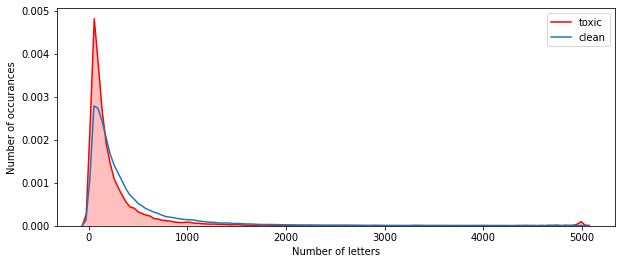

In [79]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(df[df.clean == 0].count_letters, label="toxic",shade=True,color='r')
ax=sns.kdeplot(df[df.clean == 1].count_letters, label="clean")
plt.legend()
plt.ylabel('Number of occurances')
plt.xlabel('Number of letters')

Text(0.5, 0, 'Number of words')

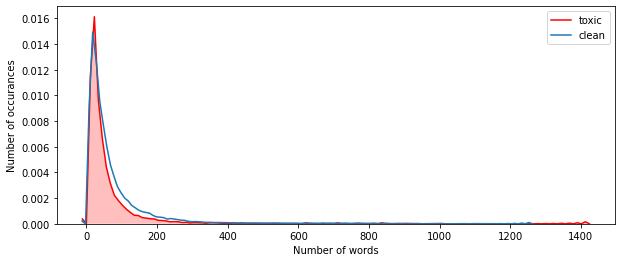

In [80]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(df[df.clean == 0].count_word, label="toxic",shade=True,color='r')
ax=sns.kdeplot(df[df.clean == 1].count_word, label="clean")
plt.legend()
plt.ylabel('Number of occurances')
plt.xlabel('Number of words')

Text(0.5, 0, 'Number of sentences')

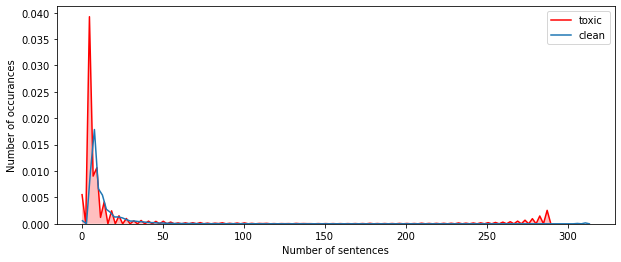

In [81]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(df[df.clean == 0].count_sent, label="toxic",shade=True,color='r')
ax=sns.kdeplot(df[df.clean == 1].count_sent, label="clean")
plt.legend()
plt.ylabel('Number of occurances')
plt.xlabel('Number of sentences')